In [1]:
# common data sci lib
import pandas as pd
import numpy as np

# Visualisation lib
import seaborn as sns
import matplotlib.pyplot as plt

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

/Users/aditya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/Users/aditya/ANZ internship/df.csv')

In [3]:
df

,status,card_present_flag,txn_description,first_name,balance,gender,age,merchant_state,amount,customer_id,longitude,latitude,month,day,day_name,month_name
0,authorized,1.0,POS,Diana,35.39,F,26,QLD,16.25,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
1,authorized,0.0,SALES-POS,Diana,21.20,F,26,NSW,14.19,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
2,authorized,1.0,POS,Michael,5.71,M,38,NSW,6.42,CUS-2142601169,151.23,-33.94,8,1,Wednesday,August
3,authorized,1.0,SALES-POS,Rhonda,2117.22,F,40,QLD,40.90,CUS-1614226872,153.10,-27.66,8,1,Wednesday,August
4,authorized,1.0,SALES-POS,Diana,17.95,F,26,QLD,3.25,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10789,authorized,0.0,POS,Melissa,14054.14,F,30,VIC,9.79,CUS-55310383,149.83,-29.47,10,31,Wednesday,October
10790,authorized,1.0,SALES-POS,Robert,9137.79,M,20,NSW,63.87,CUS-2688605418,151.22,-33.87,10,31,Wednesday,October
10791,authorized,1.0,POS,Craig,45394.57,M,28,NSW,43.96,CUS-2663907001,151.12,-33.89,10,31,Wednesday,October
10792,authorized,1.0,SALES-POS,Tyler,11350.67,M,69,VIC,30.77,CUS-1388323263,144.96,-37.76,10,31,Wednesday,October


### Month wise analysis

In [4]:
#Colors for the bar of the graph

my_colors = ['r','b','k','y','m','c','#16A085','salmon' , '#32e0c4']

Text(0.5, 0, 'Month')

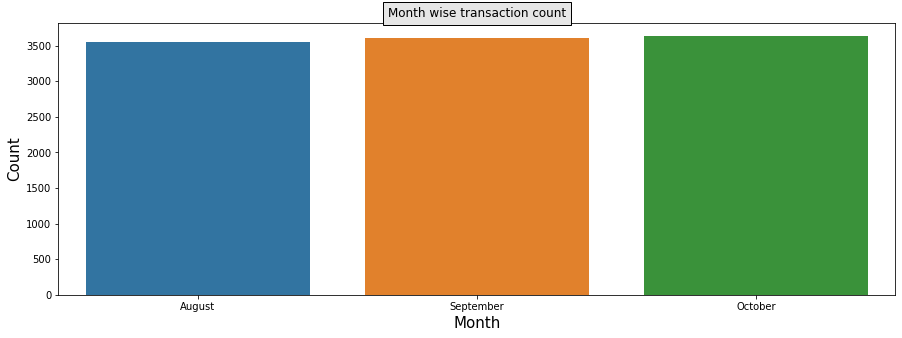

In [5]:
# visualize month wise transaction count

plt.figure(figsize=(15,5))
plt.title("Month wise transaction count",bbox={'facecolor':'0.9', 'pad':5})
sns.countplot(x='month_name' , data=df)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Month",fontsize=15)

Text(0.5, 1.0, 'Percentage of contribution from each months')

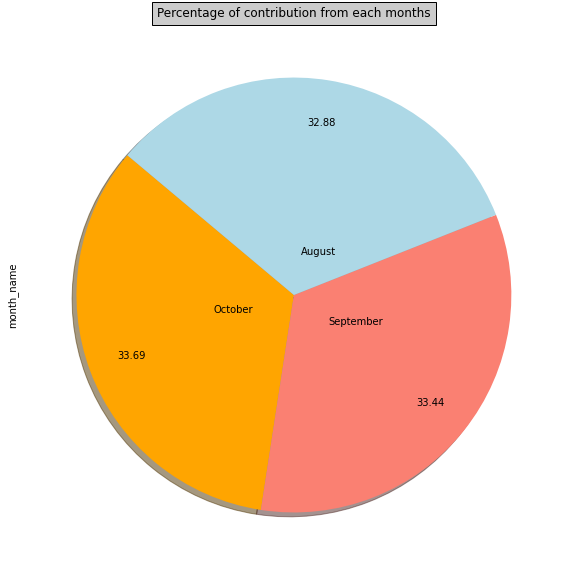

In [6]:
# visualize percentage of contribution from each month

pie_color = ['orange' , 'salmon', 'lightblue']
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)

df['month_name'].value_counts(sort=True).plot.pie(labeldistance=0.2 ,
                                         colors=pie_color,
                                        autopct='%.2f', shadow=True, startangle=140,pctdistance=0.8 , radius=1)
plt.title("Percentage of contribution from each months", bbox={'facecolor':'0.8', 'pad':5})

**Inference** : The transaction count steadily increases through the three months of August, September and October. The highest transactions occur in October.

However, the exact transaction amount might be different within the three months. So lets check what month contributes to the highest transaction amount, or, what month makes more money !

In [7]:
# month wise transaction amount

month_amount=df.groupby(['month_name']).amount.agg([sum])
ma=month_amount.sort_values(by='sum',ascending=False)
ma

,sum
month_name,
September,147564.60
October,145714.59
August,138423.68


Text(0.5, 0, 'Month')

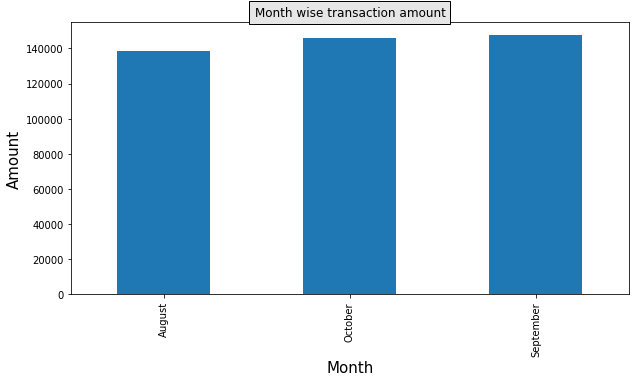

In [8]:
# visualize month wise transaction amount

plt.figure(figsize = (10,5))
df.groupby('month_name').amount.sum().plot(kind='bar')
plt.title("Month wise transaction amount",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Amount",fontsize=15)
plt.xlabel("Month",fontsize=15)

month_name
August       39.003573
October      40.075520
September    40.887947
Name: amount, dtype: float64


Text(0.5, 1.0, 'Average transaction amount each month')

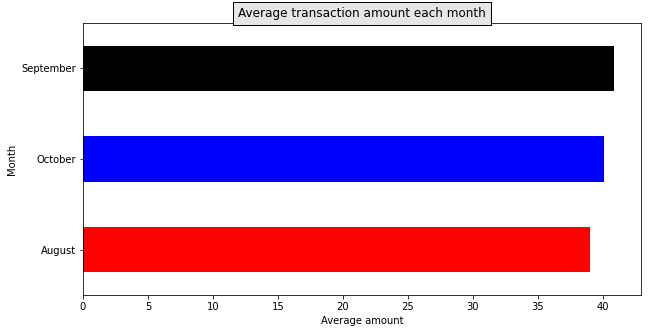

In [9]:
# visualize average transaction amount each month

month_grp = df.groupby(['month_name'])
avg_amt_tran_month = month_grp['amount'].mean()

fig,ax = plt.subplots(figsize=(10,5)) # (height,width)
print(avg_amt_tran_month);
avg_amt_tran_month.plot.barh(color=my_colors)
ax.set(xlabel="Average amount",
      ylabel="Month")
plt.title('Average transaction amount each month',bbox={'facecolor':'0.9', 'pad':5})

**Inference**: Clearly, even though no of transactions is higher in October, it is September which contributes to the highest transaction amount among the three months. 

In [10]:
# amount transacted in October month

filt = (df['month_name'] == 'October')

Now we can look at the individual statistics in each month separately as:

In [11]:
# average amount in october month

df.loc[filt , 'amount'].mean()

40.07551980198027

In [12]:
# maximum value transacted in October month 

df.loc[filt , 'amount'].max()

487.32

In [13]:
# minimum value transacted in October month 

df.loc[filt , 'amount'].min()

0.1

### Gender wise analysis

In [14]:
# gender wise transaction count

gencg=df.groupby('gender').gender.count()
gencs=gencg.sort_values(ascending=False)
gencs

gender
M    5648
F    5146
Name: gender, dtype: int64

No handles with labels found to put in legend.


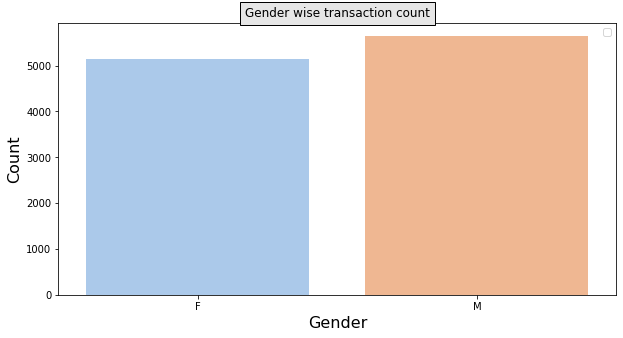

In [15]:
# visualize gender wise transaction count

plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'gender', data = df, palette = 'pastel')
ax.set_title(label = 'Gender wise transaction count',bbox={'facecolor':'0.9', 'pad':5})
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_xlabel(xlabel = 'Gender', fontsize = 16)
plt.legend()

Text(0.5, 1.0, 'Percentage of contribution from gender')

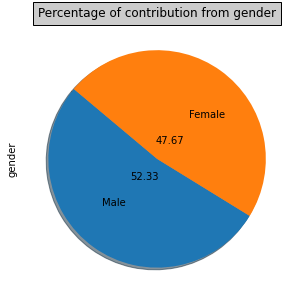

In [16]:
# visualize percentage of contribution from each gender 

plt.figure(figsize=(5,5))
df['gender'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['Male',
                                                                         'Female'], labeldistance=0.5 ,
                                                   shadow=True, startangle=140,pctdistance=0.2 , radius=1)
plt.title('Percentage of contribution from gender' , bbox={'facecolor':'0.8', 'pad':5})

In [17]:
# average transaction amount by gender 

gender_grp = df.groupby(['gender'])
gen_trans_amt = gender_grp['amount'].mean()
gen_trans_amt

gender
F    38.744318
M    41.133961
Name: amount, dtype: float64

Text(0.5, 0, 'Amount')

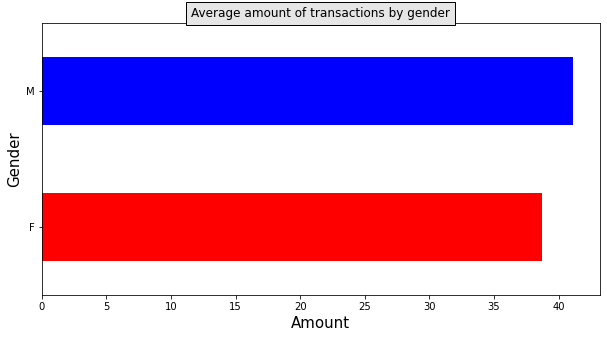

In [18]:
# visualize average amount transacted by gender

fig,ax = plt.subplots(figsize=(10,5))
gen_trans_amt.plot.barh(color=my_colors)
plt.title("Average amount of transactions by gender",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Gender",fontsize=15)
plt.xlabel("Amount",fontsize=15)

In [19]:
# total transaction amount by gender 

gender_total = df.groupby(['gender'])
gen_total_amt = gender_grp['amount'].sum()
gen_total_amt

gender
F    199378.26
M    232324.61
Name: amount, dtype: float64

Text(0.5, 0, 'Amount')

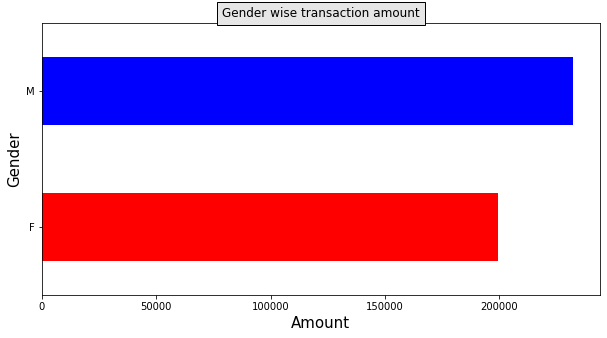

In [20]:
# visualize gender wise transaction amount

fig,ax = plt.subplots(figsize=(10,5))
gen_total_amt.plot.barh(color=my_colors)
plt.title("Gender wise transaction amount",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Gender",fontsize=15)
plt.xlabel("Amount",fontsize=15)

Text(0, 0.5, 'Count')

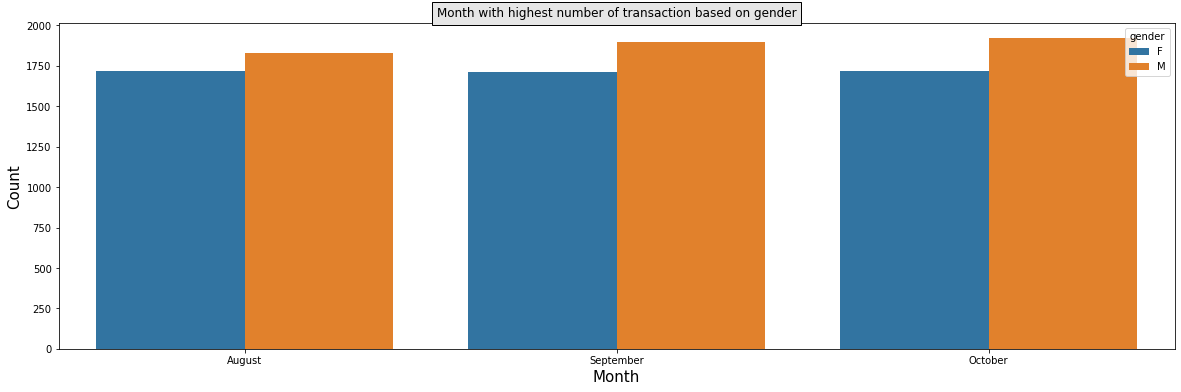

In [21]:
# visualize month with highest number of transaction based on gender

plt.figure(figsize=(20,6))
sns.countplot(x='month_name' ,hue='gender', data=df)
plt.title('Month with highest number of transaction based on gender',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count",fontsize=15)

**Inference**: From all these visualisations, we can safely conclude that males make more transactions and produce higher transaction amounts than females in every statistical aspect.

### Day wise analysis

Text(0.5, 0, 'Day')

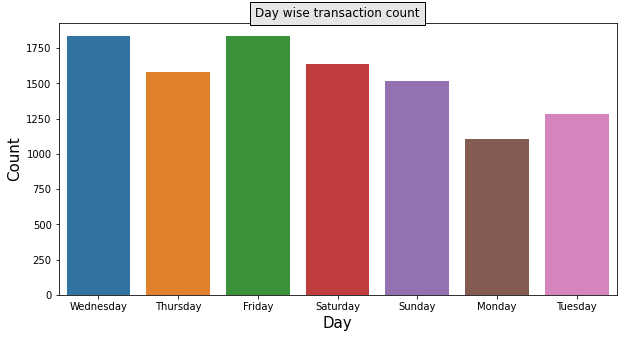

In [22]:
# visualize day wise transaction count

plt.figure(figsize=(10,5))
sns.countplot(x='day_name' , data=df)
plt.title("Day wise transaction count",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Count",fontsize=15)
plt.xlabel("Day",fontsize=15)

In [23]:
# average amount transacted on particular Day : Monday

day_name_grp = df.groupby(['day_name'])
day_name_grp['amount'].mean().loc['Monday']

42.648381555153755

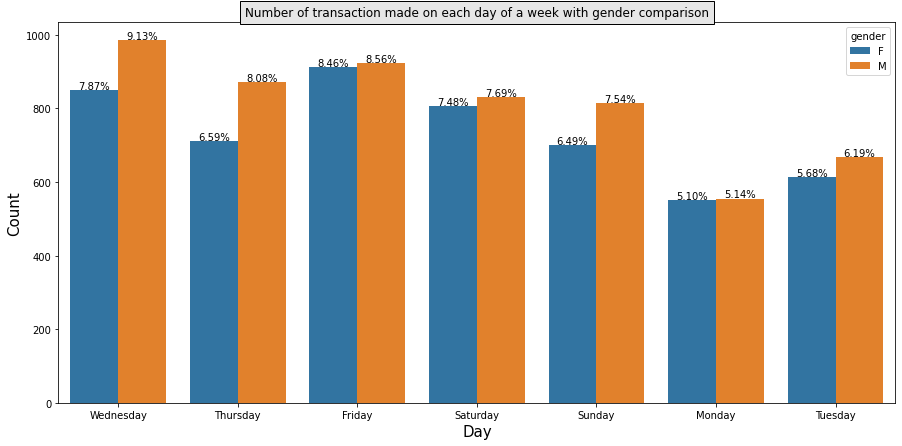

In [24]:
# visualize day wise gender transaction count

plt.figure(figsize=(15,7))
ax = sns.countplot(x="day_name", hue="gender", data=df) # for Seaborn version 0.7 and more
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.ylabel("Count",fontsize=15)
plt.xlabel("Day",fontsize=15)
plt.title('Number of transaction made on each day of a week with gender comparison',bbox={'facecolor':'0.9', 'pad':5})
plt.show()

**Inference**: Most transactions occur on Wednesday and Friday, while the least transactions occur on Monday. Also, throughout the days of the week, males make more transactions than females.

### Age wise analysis

Text(0.5, 0, 'Age')

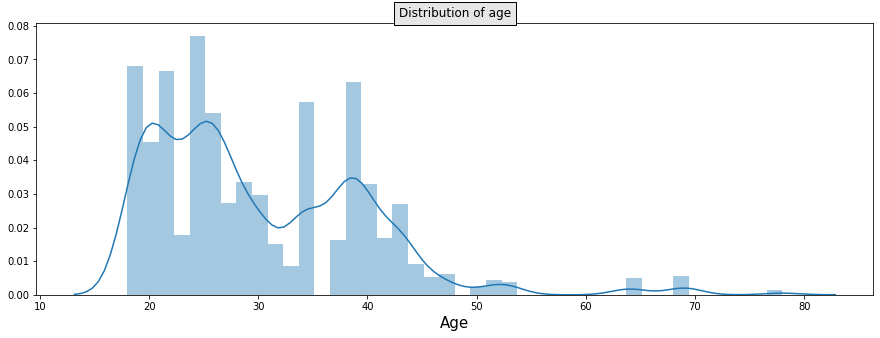

In [25]:
# visualize distribution of age

plt.figure(figsize=(15,5))
sns.distplot(df['age']);
plt.title('Distribution of age',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel('Age',fontsize=15)

Text(0, 0.5, 'Balance')

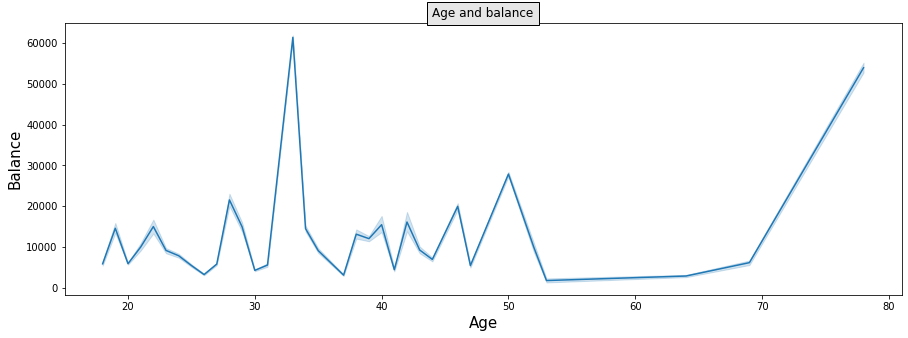

In [26]:
# visualize age with balance

plt.figure(figsize=(15,5))
sns.lineplot(x='age' , y='balance' , data=df)
plt.title('Age and balance',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel('Age',fontsize=15)
plt.ylabel('Balance',fontsize=15)

Text(0, 0.5, 'Amount')

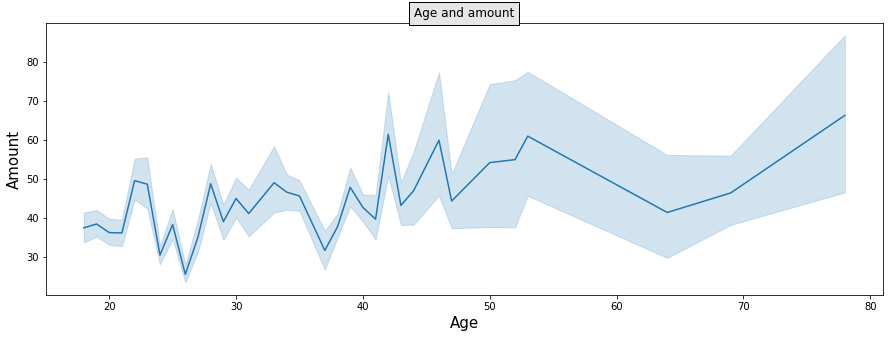

In [27]:
# visualize age with amount

plt.figure(figsize=(15,5))
sns.lineplot(x='age' , y='amount' , data=df)
plt.title('Age and amount',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel('Age',fontsize=15)
plt.ylabel('Amount',fontsize=15)

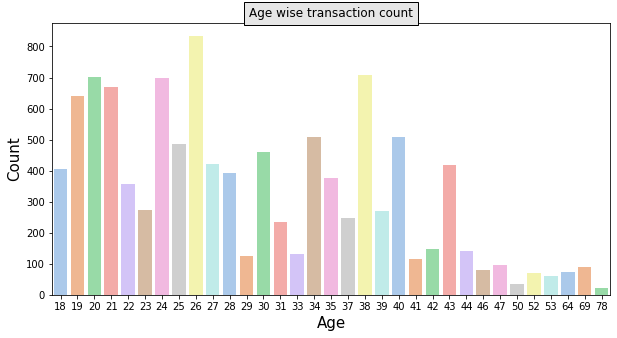

In [28]:
# visualize age wise transaction count

agecg=df.groupby('age').age.count()
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'age', data = df, palette = 'pastel')
ax.set_title(label = 'Age wise transaction count',bbox={'facecolor':'0.9', 'pad':5})
ax.set_ylabel(ylabel = 'Count', fontsize = 15)
ax.set_xlabel(xlabel = 'Age', fontsize = 15)
plt.show()

Text(0.5, 0, 'Age')

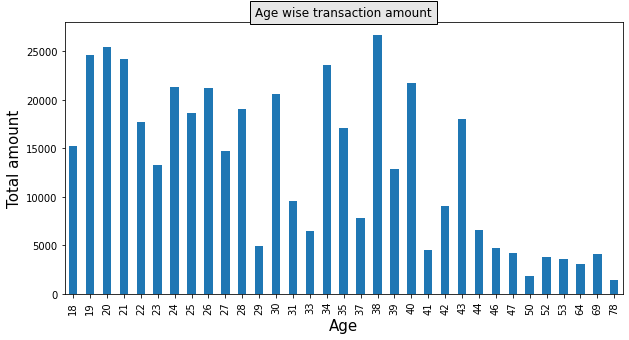

In [29]:
# visualize age wise transaction amount

ageag=df.groupby(['age']).amount.agg([sum])
plt.figure(figsize = (10,5))
df.groupby('age').amount.sum().plot(kind='bar')
plt.title("Age wise transaction amount",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Total amount",fontsize=15)
plt.xlabel("Age",fontsize=15)

### Transaction type analysis

SALES-POS     3846
POS           3694
PAYMENT       2477
INTER BANK     690
PHONE BANK      87
Name: txn_description, dtype: int64


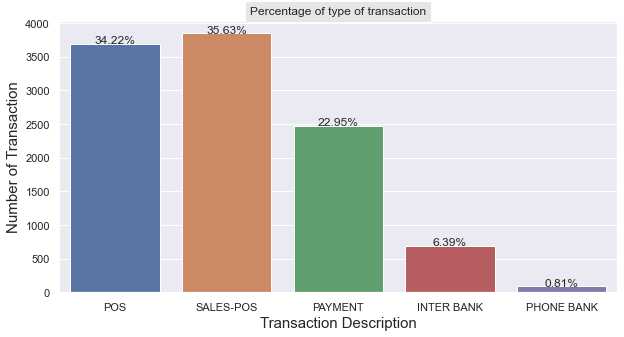

In [30]:
# visualize type of transaction

print(df['txn_description'].value_counts())
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
ax = sns.countplot(df['txn_description'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.title('Percentage of type of transaction',bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel('Number of Transaction',fontsize=15)
plt.xlabel('Transaction Description',fontsize=15)
plt.show()


### State wise transaction analysis

NSW    2137
VIC    2029
QLD    1531
WA     1096
SA      409
NT      202
ACT      71
TAS      65
Name: merchant_state, dtype: int64


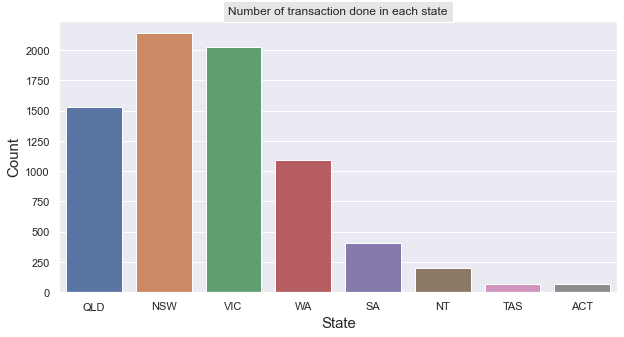

In [32]:
# visualize state wise transaction count

print(df['merchant_state'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df['merchant_state'])
plt.title('Number of transaction done in each state',bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Count",fontsize=15)
plt.xlabel("State",fontsize=15)
plt.show()


In [33]:
# group using merchant_state 

mer_state_grp = df.groupby(['merchant_state'])

merchant_state  gender
ACT             F         0.647887
                M         0.352113
NSW             M         0.547496
                F         0.452504
NT              F         0.975248
                M         0.024752
QLD             F         0.518615
                M         0.481385
SA              F         0.584352
                M         0.415648
TAS             M         0.753846
                F         0.246154
VIC             M         0.585510
                F         0.414490
WA              F         0.597628
                M         0.402372
Name: gender, dtype: float64


Text(0.5, 1.0, 'Number of transaction in a state')

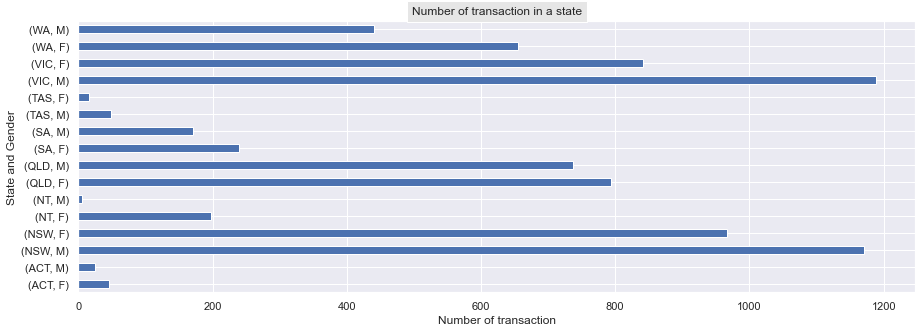

In [34]:
# visualize number of transaction in merchant state by gender

print(mer_state_grp['gender'].value_counts(normalize=True))
gen_mer_state = mer_state_grp['gender'].value_counts()
fig,ax = plt.subplots(figsize=(15,5))
gen_mer_state.plot.barh()
ax.set(xlabel="Number of transaction",
      ylabel="State and Gender")
plt.title('Number of transaction in a state',bbox={'facecolor':'0.9', 'pad':5})

In [35]:
# maximum,minimum and average amount transacted in each merchant state

agg_amt_state = mer_state_grp['amount'].agg(['min' , 'mean' , 'max'])
agg_amt_state

,min,mean,max
merchant_state,,,
ACT,4.50,33.875070,156.68
NSW,0.10,37.304848,496.76
NT,1.71,29.435693,481.00
QLD,0.10,23.542658,475.52
SA,3.28,31.837922,412.53
TAS,7.35,26.083692,133.31
VIC,0.10,31.857482,487.32
WA,2.05,27.355365,390.67


merchant_state
ACT    4.50
NSW    0.10
NT     1.71
QLD    0.10
SA     3.28
TAS    7.35
VIC    0.10
WA     2.05
Name: min, dtype: float64


Text(0.5, 1.0, 'Minimum Number of transaction in a state')

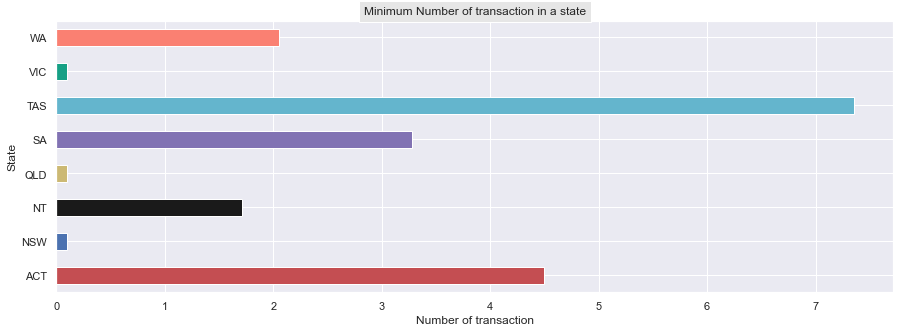

In [36]:
# visualize minimum amount transacted in each state

fig,ax = plt.subplots(figsize=(15,5)) # (height,width)
print(agg_amt_state['min'])
agg_amt_state['min'].plot.barh(color=my_colors)
ax.set(xlabel="Number of transaction",
      ylabel="State")
plt.title('Minimum Number of transaction in a state',bbox={'facecolor':'0.9', 'pad':5})

merchant_state
ACT    156.68
NSW    496.76
NT     481.00
QLD    475.52
SA     412.53
TAS    133.31
VIC    487.32
WA     390.67
Name: max, dtype: float64


Text(0.5, 1.0, 'Maximum amount transacted in each state')

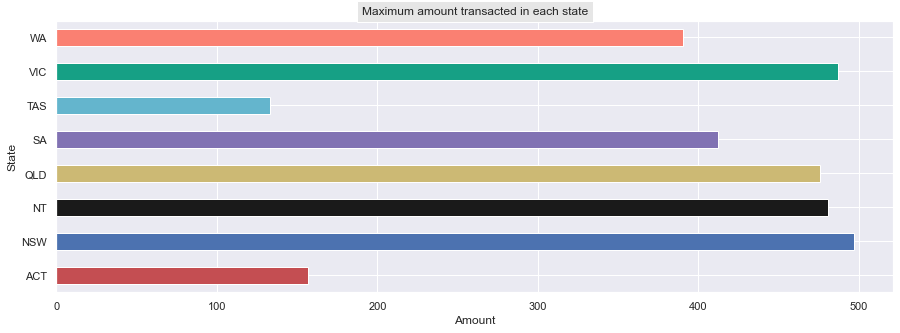

In [37]:
# visualize maximum amount transacted in each state

fig,ax = plt.subplots(figsize=(15,5)) # (height,width)
print(agg_amt_state['max'])
agg_amt_state['max'].plot.barh(color=my_colors)
ax.set(xlabel="Amount",
      ylabel="State")
plt.title('Maximum amount transacted in each state',bbox={'facecolor':'0.9', 'pad':5})

### Customer analysis

In [40]:
# customer dataframe

df_cus = df[~df['txn_description'].isin(['PAY/SALARY'])]
df_cus.head()

,status,card_present_flag,txn_description,first_name,balance,gender,age,merchant_state,amount,customer_id,longitude,latitude,month,day,day_name,month_name
0,authorized,1.0,POS,Diana,35.39,F,26,QLD,16.25,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
1,authorized,0.0,SALES-POS,Diana,21.20,F,26,NSW,14.19,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
2,authorized,1.0,POS,Michael,5.71,M,38,NSW,6.42,CUS-2142601169,151.23,-33.94,8,1,Wednesday,August
3,authorized,1.0,SALES-POS,Rhonda,2117.22,F,40,QLD,40.90,CUS-1614226872,153.10,-27.66,8,1,Wednesday,August
4,authorized,1.0,SALES-POS,Diana,17.95,F,26,QLD,3.25,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August


In [41]:
# customers with highest transaction count 

top_customers = df_cus['first_name'].value_counts(sort=True).nlargest(20)
top_customers

Michael        675
Diana          561
Jessica        390
Jeffrey        374
Joseph         369
Richard        339
Kimberly       313
Tonya          285
Susan          257
Christopher    250
Rhonda         246
Tiffany        217
Ryan           209
Tyler          197
Robert         193
Kenneth        188
Virginia       185
Michelle       170
Sandra         164
James          162
Name: first_name, dtype: int64

Text(0.5, 1.0, 'Top customers')

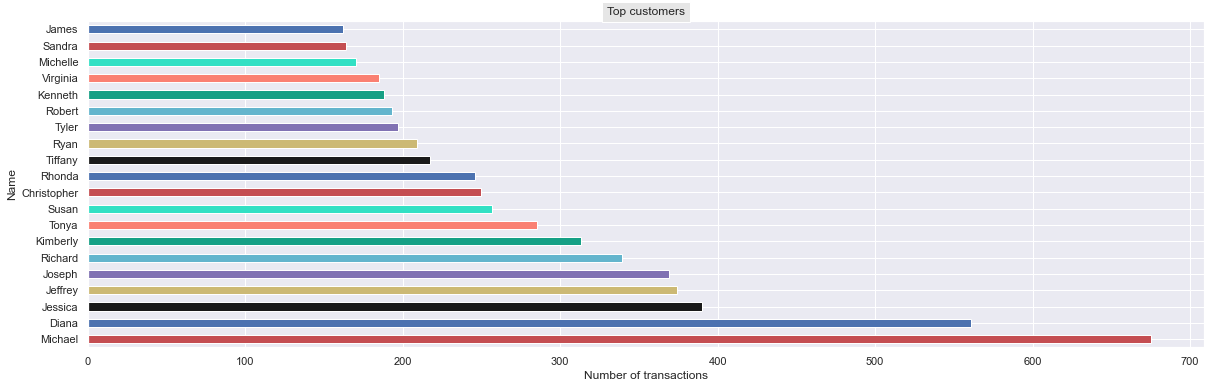

In [42]:
# visualize top customers

fig,ax = plt.subplots(figsize=(20,6)) # (height,width)
top_customers.plot.barh(color=my_colors)
ax.set(xlabel="Number of transactions",
      ylabel="Name")
plt.title('Top customers',bbox={'facecolor':'0.9', 'pad':5})

Micheal is our most valuable customer followed by Diana, Jessica and others.

Individual analysis on Micheal :

In [43]:
michael_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Michael').sum())

merchant_state
ACT      1
NSW    270
NT       0
QLD     25
SA      18
TAS      2
VIC    141
WA      58
Name: first_name, dtype: int64


Text(0.5, 1.0, 'Transaction count by an individual customer in each state')

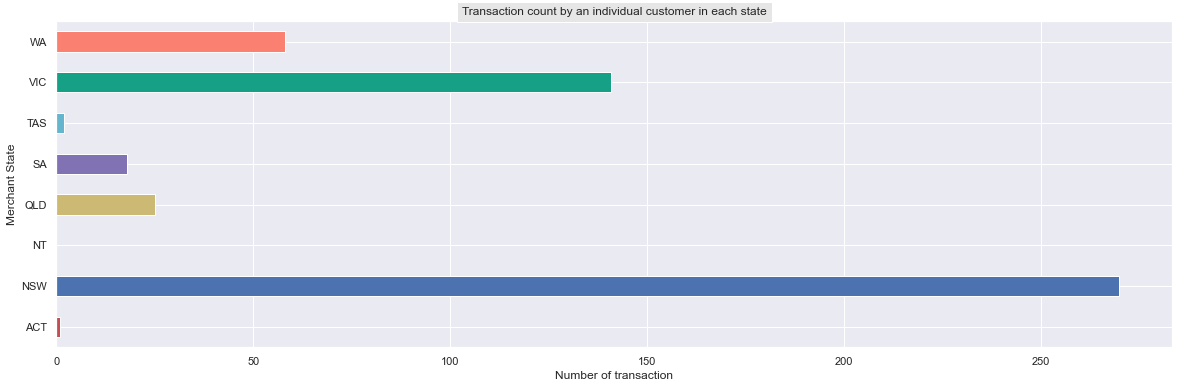

In [44]:
# visualize transaction count by Michael in each state

fig,ax = plt.subplots(figsize=(20,6))
print(michael_tran_each_state);
michael_tran_each_state.plot.barh(color=my_colors)
ax.set(xlabel="Number of transaction",
      ylabel="Merchant State")
plt.title('Transaction count by an individual customer in each state',bbox={'facecolor':'0.9', 'pad':5})

### Card payment analysis

1.0    6050
0.0    1490
Name: card_present_flag, dtype: int64


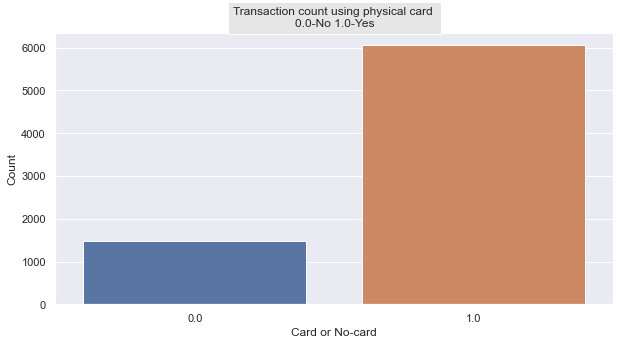

In [45]:
# visualize number of transaction by card

plt.figure(figsize=(10,5))
print(df['card_present_flag'].value_counts())
ax = sns.countplot(x='card_present_flag' , data=df)
total = float(len(df['card_present_flag']))
plt.xlabel("Card or No-card")
plt.ylabel("Count")
plt.title('Transaction count using physical card \n'+'0.0-No 1.0-Yes',bbox={'facecolor':'0.9', 'pad':5} )
plt.show()

Text(0.5, 1.0, 'Percentage of card payment')

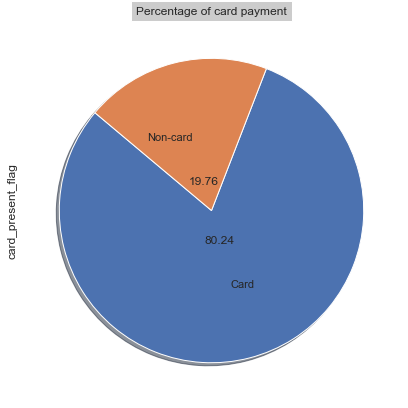

In [46]:
# visualize transaction by card 

plt.figure(figsize=(10,7))
df['card_present_flag'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['Card',
                                                                         'Non-card'], labeldistance=0.5 ,
                                                   shadow=True, startangle=140,pctdistance=0.2 , radius=1)
plt.title('Percentage of card payment' , bbox={'facecolor':'0.8', 'pad':5})

### Transaction status analysis

An authorized transaction is a debit or credit card purchase for which the merchant has received approval from the bank that issued the customer's payment card.

A posted transaction is a debit or credit that has been fully processed. Once a transaction is posted the account balance on the account is also updated.

Text(0.5, 1.0, 'Percentage of transaction status')

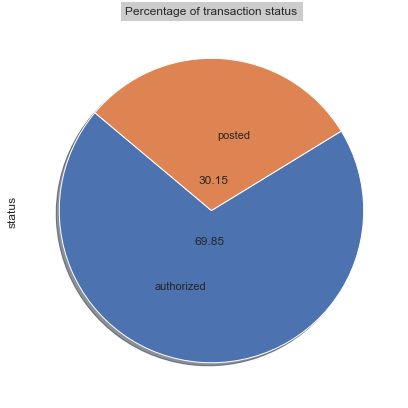

In [47]:
# visualize transaction status

plt.figure(figsize=(10,7))
df['status'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['authorized',
                                                                         'posted'], labeldistance=0.5 ,
                                                   shadow=True, startangle=140,pctdistance=0.2 , radius=1)
plt.title('Percentage of transaction status' , bbox={'facecolor':'0.8', 'pad':5})